In [1]:
import generator

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# No outliers, no drift

In [3]:
N = 24*7

data = [generator.generate_step(t=t, period=24, amplitude=100, error=20, mean=200) for t in range(N)]

In [4]:
df = pd.DataFrame(data={
    'x': range(N),
    'ds': pd.date_range(start="now", periods=N, freq='1h'),
    'y': data
})
df.head(n=10)

,x,ds,y
0,0,2022-06-27 13:33:11.642817,204.441464
1,1,2022-06-27 14:33:11.642817,228.382227
2,2,2022-06-27 15:33:11.642817,263.591393
3,3,2022-06-27 16:33:11.642817,290.072450
4,4,2022-06-27 17:33:11.642817,290.285281
5,5,2022-06-27 18:33:11.642817,304.705069
6,6,2022-06-27 19:33:11.642817,301.916943
7,7,2022-06-27 20:33:11.642817,310.733838
8,8,2022-06-27 21:33:11.642817,304.168610
9,9,2022-06-27 22:33:11.642817,274.046926


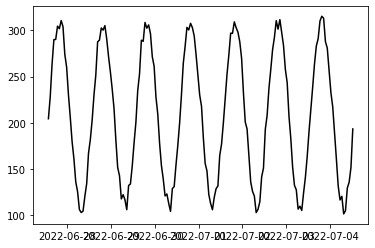

In [5]:
plt.plot(df.ds, df.y, c="k")
plt.show()

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf

from alibi_detect.cd import MMDDrift

Importing plotly failed. Interactive plots will not work.


In [7]:
pred_array = df[['y']].to_numpy()
pred_array

array([[204.44146434],
       [228.38222698],
       [263.59139288],
       [290.07244997],
       [290.28528067],
       [304.70506903],
       [301.91694333],
       [310.73383811],
       [304.1686101 ],
       [274.04692642],
       [260.18147294],
       [230.22138574],
       [205.7234365 ],
       [179.44816637],
       [160.94031476],
       [136.0056328 ],
       [125.43433761],
       [105.97309913],
       [102.81344614],
       [104.37024042],
       [120.51039249],
       [134.22484374],
       [167.05691389],
       [182.00937411],
       [202.90794227],
       [230.13553661],
       [251.6591532 ],
       [287.67991259],
       [289.53725121],
       [302.68916316],
       [300.3604022 ],
       [305.2703957 ],
       [290.61960364],
       [271.55709789],
       [255.16884054],
       [236.55766892],
       [215.50040344],
       [181.4631576 ],
       [151.65269142],
       [142.66730872],
       [117.58373553],
       [122.11191206],
       [116.57478914],
       [105

In [8]:
cd = MMDDrift(df[['y']].to_numpy())

2022-06-27 13:33:19.656408: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
drifts = [0]*2
thresh = [0]*2

pred_array = df[['y']].to_numpy()
for i in range(2, N):
    preds = cd.predict(pred_array[i-2:i])
    data = preds["data"]
    drifts.append(data['is_drift'])
    thresh.append(data['threshold'])

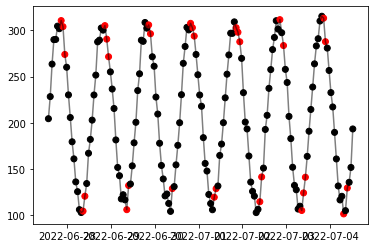

In [10]:
df['is_drift'] = drifts
df['colour'] = df['is_drift'].apply(lambda x: "k" if x==0 else "r")
df['threshold'] = thresh

plt.plot(df.ds, df.y, alpha=0.5, c='k')
plt.scatter(df.ds, df.y, c=df.colour, label=df.colour)
plt.show()

# Trend drift

In [11]:
N = 100

test_df = pd.DataFrame(data={
    'x': range(N),
    'ds': pd.date_range(start="now", periods=N, freq='1h'),
    'y': [generator.generate_step(t=t, period=24, amplitude=100, error=20, mean=200) for t in range(N)] + np.linspace(start=0, stop=100, num=N)
})
test_df.head()

,x,ds,y
0,0,2022-06-27 13:33:48.037873,216.555416
1,1,2022-06-27 14:33:48.037873,236.392533
2,2,2022-06-27 15:33:48.037873,262.194106
3,3,2022-06-27 16:33:48.037873,279.775766
4,4,2022-06-27 17:33:48.037873,305.093547


In [12]:
drifts = [0]*2
thresh = [0]*2

pred_array = test_df[['y']].to_numpy()
for i in range(2, N):
    preds = cd.predict(pred_array[i-2:i])
    data = preds["data"]
    drifts.append(data['is_drift'])
    thresh.append(data['threshold'])

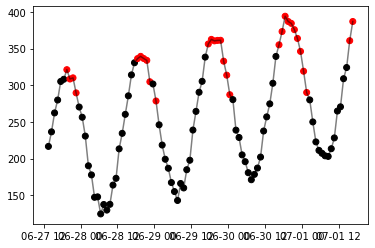

In [13]:
test_df['is_drift'] = drifts
test_df['colour'] = test_df['is_drift'].apply(lambda x: "k" if x==0 else "r")
test_df['threshold'] = thresh
# test_df['stat'] = stats

plt.plot(test_df.ds, test_df.y, alpha=0.5, c='k')
plt.scatter(test_df.ds, test_df.y, c=test_df.colour, label=test_df.colour)
plt.show()

# "Real" data

In [34]:
N = 60 * 24  # minutes * hours

data = [generator.generate_step(t=t, period=N, amplitude=0.1, error=100, mean=200) for t in range(N)]

In [35]:
df = pd.DataFrame(data={
    'x': range(N),
    'ds': pd.date_range(start="now", periods=N, freq='1min'),
    'y': data
})
df.head(n=10)

,x,ds,y
0,0,2022-06-27 13:45:22.093787,211.354518
1,1,2022-06-27 13:46:22.093787,265.127683
2,2,2022-06-27 13:47:22.093787,235.174836
3,3,2022-06-27 13:48:22.093787,261.019980
4,4,2022-06-27 13:49:22.093787,228.583535
5,5,2022-06-27 13:50:22.093787,227.599539
6,6,2022-06-27 13:51:22.093787,249.666706
7,7,2022-06-27 13:52:22.093787,276.222698
8,8,2022-06-27 13:53:22.093787,229.130553
9,9,2022-06-27 13:54:22.093787,245.556236


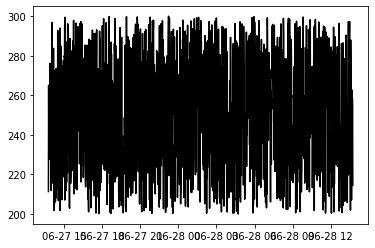

In [36]:
plt.plot(df.ds[0:1800], df.y[0:1800], c="k")

The training of the drift detector:

In [37]:
cd = MMDDrift(df[['y']].to_numpy(), p_val=0.05)

In [38]:
NC = 50

pred_array = df[['y']].to_numpy()
chunks = np.array_split(pred_array, NC)

In [39]:
drifts = []
thresh = []

for i in range(NC):
    preds = cd.predict(chunks[i])
    pdata = preds["data"]
    drifts.append(pdata['is_drift'])
    thresh.append(pdata['threshold'])

In [40]:
print(drifts)
print(thresh)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]


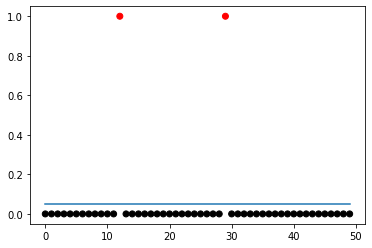

In [41]:
colour = ["k" if d == 0 else "r" for d in drifts]
plt.scatter(range(NC), drifts, c=colour)
plt.plot(range(NC), thresh)

## Testing with a trend

In [42]:
df = pd.DataFrame(data={
    'x': range(N),
    'ds': pd.date_range(start="now", periods=N, freq='1min'),
    'y': data + np.linspace(start=0, stop=100, num=N)
})
df.head(n=10)

,x,ds,y
0,0,2022-06-27 13:46:39.604746,211.354518
1,1,2022-06-27 13:47:39.604746,265.197175
2,2,2022-06-27 13:48:39.604746,235.313822
3,3,2022-06-27 13:49:39.604746,261.228458
4,4,2022-06-27 13:50:39.604746,228.861506
5,5,2022-06-27 13:51:39.604746,227.947003
6,6,2022-06-27 13:52:39.604746,250.083662
7,7,2022-06-27 13:53:39.604746,276.709147
8,8,2022-06-27 13:54:39.604746,229.686495
9,9,2022-06-27 13:55:39.604746,246.181671


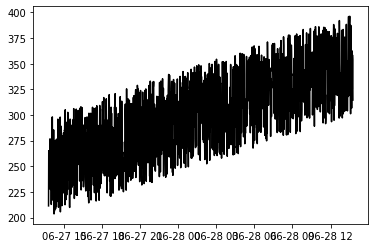

In [47]:
plt.plot(df.ds[0:1800], df.y[0:1800], c="k")

In [43]:
NC = 50

pred_array = df[['y']].to_numpy()
chunks = np.array_split(pred_array, NC)

In [44]:
drifts = []
thresh = []

for i in range(NC):
    preds = cd.predict(chunks[i])
    pdata = preds["data"]
    drifts.append(pdata['is_drift'])
    thresh.append(pdata['threshold'])

In [45]:
print(drifts)
print(thresh)

[0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]


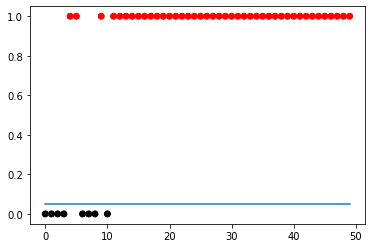

In [46]:
colour = ["k" if d == 0 else "r" for d in drifts]
plt.scatter(range(NC), drifts, c=colour)
plt.plot(range(NC), thresh)

## Saving the model

In [48]:
from alibi_detect.utils.saving import save_detector

save_detector(detector=cd, filepath="./model")